In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /home/inflaton/code/projects/courses/llm-finetuning


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /home/inflaton/code/projects/courses/llm-finetuning/.env


True

In [4]:
from llm_toolkit.translation_utils import *

loading /home/inflaton/code/projects/courses/llm-finetuning/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to /home/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Data Processing

In [ ]:
import pandas as pd

df = pd.read_csv("results/mac-results.csv")
df.head(2)

chinese  \
0  老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...   
1  次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...   

                                             english  \
0  Old Geng picked up his shotgun, squinted, and ...   
1  Next day Grannie Liu was up before dawn. As so...   

                         unsloth/Qwen2-0.5B-Instruct  \
0  Old Tang held his gun, squinting his eyes with...   
1  The next morning when it was still dark, Liu G...   

              unsloth/Qwen2-0.5B-Instruct(finetuned)  \
0  Old Geng lifted his rifle and narrowed his eye...   
1  It was still not light when this little update...   

                         unsloth/Qwen2-1.5B-Instruct  \
0  Old Geng took up his gun, squinted one of its ...   
1  By the time the next day dawned, Liu Lao got u...   

              unsloth/Qwen2-1.5B-Instruct(finetuned)  \
0  Old Geng raised the rifle, squeezed one tiny t...   
1  Having been woken just before daybreak, Granni...   

                unsloth/Qwen2-0.5B-Instruct-bnb-4bit  \
0  Old Teng raised his gun and looked up at a pai...   
1  The next day at dawn, Liu Geowon got up early ...   

     unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned)  \
0  Old Geng raised his rifle, squinted his eyes, ...   
1  Three or four hours before this, Grannie Liu h...   

                unsloth/Qwen2-1.5B-Instruct-bnb-4bit  \
0  Old耿拿起枪，眯着眼睛一搂扳机就响了枪，金麻雀噼里啪啦的往下掉，铁砂子在柳枝间飞溅，发出“...   
1  At dawn the next day, Liu Langlang got up to b...   

     unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned)  \
0  Old Geng raised his pistol, squinted, and fire...   
1  But by some miracle of preparation, Grannie Li...   

                           unsloth/Qwen2-7B-Instruct  \
0  Old Aigang raised his rifle, squinting one of ...   
1  The next morning, before dawn, Old Liu rose to...   

                unsloth/Qwen2-7B-Instruct(finetuned)  \
0  Old Geng raised his rifle and squinted into th...   
1  First thing next morning Grannie Liu rose befo...   

                  unsloth/Qwen2-7B-Instruct-bnb-4bit  \
0  Old Geng raised his gun, squinting one of his ...   
1  The next morning, before dawn, Old Liu rose to...   

       unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)  
0  Old Geng raised his rifle and squinted into th...  
1  First thing in the morning Grannie Liu rose an...

In [ ]:
df.columns.to_list()

['chinese',
 'english',
 'unsloth/Qwen2-0.5B-Instruct',
 'unsloth/Qwen2-0.5B-Instruct(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct',
 'unsloth/Qwen2-1.5B-Instruct(finetuned)',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-7B-Instruct',
 'unsloth/Qwen2-7B-Instruct(finetuned)',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)']

In [ ]:
df = df[
    [
        "chinese",
        "english",
        "unsloth/Qwen2-0.5B-Instruct",
        "unsloth/Qwen2-0.5B-Instruct-bnb-4bit",
        "unsloth/Qwen2-0.5B-Instruct(finetuned)",
        "unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned)",
        "unsloth/Qwen2-1.5B-Instruct",
        "unsloth/Qwen2-1.5B-Instruct-bnb-4bit",
        "unsloth/Qwen2-1.5B-Instruct(finetuned)",
        "unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned)",
        "unsloth/Qwen2-7B-Instruct",
        "unsloth/Qwen2-7B-Instruct-bnb-4bit",
        "unsloth/Qwen2-7B-Instruct(finetuned)",
        "unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)",
    ]
]

In [ ]:
df.to_csv("results/experiment-1-results.csv", index=False)

In [ ]:
df = pd.read_csv("results/mac-results_final.csv")
df.head(2)

chinese  \
0  老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...   
1  次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...   

                                             english  \
0  Old Geng picked up his shotgun, squinted, and ...   
1  Next day Grannie Liu was up before dawn. As so...   

                         unsloth/Qwen2-0.5B-Instruct  \
0  Old Teng holds his gun up, his eyes narrowed a...   
1  The next morning, Liu Geo woke up at five o'cl...   

              unsloth/Qwen2-0.5B-Instruct(finetuned)  \
0  Old Geng raised his rifle and tilted his head ...   
1  But not before noon did Grannie Liu rise up an...   

                         unsloth/Qwen2-1.5B-Instruct  \
0  Old Jin raises his gun, squints one eye as he ...   
1  At dawn the next day, Liu Langlang got up earl...   

              unsloth/Qwen2-1.5B-Instruct(finetuned)  \
0  Old Geng raised his pistol, squinted through t...   
1  She got up about dawn with a purpose already e...   

                  unsloth/Qwen2-7B-Instruct-bnb-4bit  \
0  Old Geng raised his gun, squinting one of his ...   
1  The next morning, before dawn, Old Liu rose to...   

       unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)  \
0  Old Geng raised his rifle and squinted into on...   
1  First thing next morning Grannie Liu rose earl...   

       gradientai/Llama-3-8B-Instruct-Gradient-1048k  \
0  The old man pulled out his gun, squinting one ...   
1  The next day, when the sun had not yet risen, ...   

  gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)  \
0  Old Geng raised his rifle, squinting through t...         
1  Grannie Liu got up before daylight was even vi...         

                           unsloth/Qwen2-7B-Instruct  \
0  Old Geng raised his gun, squinted one of his t...   
1  The next morning, before the dawn had fully br...   

                 unsloth/Qwen2-72B-Instruct-bnb-4bit  \
0  Lao Geng raised his gun, narrowed one of his t...   
1  Before dawn next morning, Granny Liu got up to...   

                unsloth/Qwen2-7B-Instruct(finetuned)  \
0  Old Geng raised his rifle and squinted into th...   
1  First thing in the morning Grannie Liu rose to...   

                    unsloth/mistral-7b-instruct-v0.3  \
0  Geng Da initiates firing, squinting to form a ...   
1  The next day, when it was still dark, Liu Lao ...   

         unsloth/mistral-7b-instruct-v0.3(finetuned)  \
0  Old Geng aimed and fired. A triangular slit op...   
1  Before dawn next day Grannie Liu got up and bu...   

      unsloth/Qwen2-72B-Instruct-bnb-4bit(finetuned)  
0  Old Geng raised his gun, narrowed one of his t...  
1  As soon as it was light, Grannie Liu got up an...

In [ ]:
df.columns.to_list()

['chinese',
 'english',
 'unsloth/Qwen2-0.5B-Instruct',
 'unsloth/Qwen2-0.5B-Instruct(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct',
 'unsloth/Qwen2-1.5B-Instruct(finetuned)',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)',
 'gradientai/Llama-3-8B-Instruct-Gradient-1048k',
 'gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)',
 'unsloth/Qwen2-7B-Instruct',
 'unsloth/Qwen2-72B-Instruct-bnb-4bit',
 'unsloth/Qwen2-7B-Instruct(finetuned)',
 'unsloth/mistral-7b-instruct-v0.3',
 'unsloth/mistral-7b-instruct-v0.3(finetuned)',
 'unsloth/Qwen2-72B-Instruct-bnb-4bit(finetuned)']

In [ ]:
cols = [col for col in df.columns if "7B-Instruct-bnb-4bit" in col]
cols

['unsloth/Qwen2-7B-Instruct-bnb-4bit',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)']

In [ ]:
df = df.drop(columns=cols, axis=1)
df.head()

chinese  \
0  老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...   
1  次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...   
2  钱老板道：“是，是，多谢香主。” 在一张椅上坐了，续道：“属下将小郡主藏在猪肚里带进宫来，一...   
3  但已经晚了，物理学家静静地躺在地上，半睁的双眼看着从他的头颅上流出的血迹，疯狂的会场瞬间陷入...   
4  但这时，绍琳却做出了一件出人意料的事，与一位受迫害的教育部高干结了婚，当时那名高干还在干校住...   

                                             english  \
0  Old Geng picked up his shotgun, squinted, and ...   
1  Next day Grannie Liu was up before dawn. As so...   
2  'Thank you, Master,' said Butcher Qian, seatin...   
3  But it was already too late. The physicist lay...   
4  But then Shao did something that no one expect...   

                         unsloth/Qwen2-0.5B-Instruct  \
0  Old Teng holds his gun up, his eyes narrowed a...   
1  The next morning, Liu Geo woke up at five o'cl...   
2  Money Master said, 'Yes, yes, thank you for yo...   
3  But it was too late; physicist lay lifelessly ...   
4  But this time, Rong Ling did something out of ...   

              unsloth/Qwen2-0.5B-Instruct(finetuned)  \
0  Old Geng raised his rifle and tilted his head ...   
1  But not before noon did Grannie Liu rise up an...   
2  If you like,' said Butcher Qian sitting at a t...   
3  But already too late: the physicist lay peacef...   
4  However, Shen refused to make a surprising ann...   

                         unsloth/Qwen2-1.5B-Instruct  \
0  Old Jin raises his gun, squints one eye as he ...   
1  At dawn the next day, Liu Langlang got up earl...   
2  Mr. Qian said, "Yes, yes, thank you very much....   
3  But it was too late. Physicists lay quietly on...   
4  But at this time, Shen Lin made a surprising d...   

              unsloth/Qwen2-1.5B-Instruct(finetuned)  \
0  Old Geng raised his pistol, squinted through t...   
1  She got up about dawn with a purpose already e...   
2  Of course,' said Butcher Qian gratefully. 'Tha...   
3  But it was too late. The physicist was already...   
4  But at that moment, Shao Lin did something une...   

       gradientai/Llama-3-8B-Instruct-Gradient-1048k  \
0  The old man pulled out his gun, squinting one ...   
1  The next day, when the sun had not yet risen, ...   
2  The boss said, "Yes, thank you, Master. I sat ...   
3  But it was too late. The physicist lay still o...   
4  But at that time, Shao Lin did something unexp...   

  gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)  \
0  Old Geng raised his rifle, squinting through t...         
1  Grannie Liu got up before daylight was even vi...         
2  'No, no, thank you,'said Butcher Qian, sitting...         
3  But it was too late. The physicist lay quietly...         
4  However, at that moment, Shao Lin took an unex...         

                           unsloth/Qwen2-7B-Instruct  \
0  Old Geng raised his gun, squinted one of his t...   
1  The next morning, before the dawn had fully br...   
2  Mr. Qian said, "Yes, yes, thank you for your c...   
3  But it was too late. The physicist lay quietly...   
4  But then, in a surprise move, she married a hi...   

                 unsloth/Qwen2-72B-Instruct-bnb-4bit  \
0  Lao Geng raised his gun, narrowed one of his t...   
1  Before dawn next morning, Granny Liu got up to...   
2  Mr. Qian said, "Yes, yes, many thanks, Perfume...   
3  But it was too late. The physicist lay quietly...   
4  But, in a surprising move, she married a perse...   

                unsloth/Qwen2-7B-Instruct(finetuned)  \
0  Old Geng raised his rifle and squinted into th...   
1  First thing in the morning Grannie Liu rose to...   
2  Yes, Goong-goong, ' said Butcher Qian, sitting...   
3  But it was too late. The physicist lay on the ...   
4  But then, Shao Lin surprised everyone by marry...   

                    unsloth/mistral-7b-instruct-v0.3  \
0  Geng Da initiates firing, squinting to form a ...   
1  The next day, when it was still dark, Liu Lao ...   
2  The boss said, "Yes, yes, thank you, Madam. Si...   
3  The text is: "But it's too late, the physicist...   
4  Shao Lin surprising

In [ ]:
df.columns.to_list()

['chinese',
 'english',
 'unsloth/Qwen2-0.5B-Instruct',
 'unsloth/Qwen2-0.5B-Instruct(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct',
 'unsloth/Qwen2-1.5B-Instruct(finetuned)',
 'gradientai/Llama-3-8B-Instruct-Gradient-1048k',
 'gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)',
 'unsloth/Qwen2-7B-Instruct',
 'unsloth/Qwen2-72B-Instruct-bnb-4bit',
 'unsloth/Qwen2-7B-Instruct(finetuned)',
 'unsloth/mistral-7b-instruct-v0.3',
 'unsloth/mistral-7b-instruct-v0.3(finetuned)',
 'unsloth/Qwen2-72B-Instruct-bnb-4bit(finetuned)']

In [ ]:
df = df[
    [
        "chinese",
        "english",
        "unsloth/Qwen2-0.5B-Instruct",
        "unsloth/Qwen2-0.5B-Instruct(finetuned)",
        "unsloth/Qwen2-1.5B-Instruct",
        "unsloth/Qwen2-1.5B-Instruct(finetuned)",
        "unsloth/Qwen2-7B-Instruct",
        "unsloth/Qwen2-7B-Instruct(finetuned)",
        "unsloth/mistral-7b-instruct-v0.3",
        "unsloth/mistral-7b-instruct-v0.3(finetuned)",
        "gradientai/Llama-3-8B-Instruct-Gradient-1048k",
        "gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)",
        "unsloth/Qwen2-72B-Instruct-bnb-4bit",
        "unsloth/Qwen2-72B-Instruct-bnb-4bit(finetuned)",
    ]
]

In [ ]:
df.to_csv("results/experiment-2-results.csv", index=False)

In [ ]:
df1 = pd.read_csv("results/mac-results-no-flash-attn.csv")
df2 = pd.read_csv("results/mac-results-with-flash-attn.csv")

In [ ]:
df2.columns.to_list()

['chinese',
 'english',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-0.5B-Instruct',
 'unsloth/Qwen2-0.5B-Instruct(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct',
 'unsloth/Qwen2-1.5B-Instruct(finetuned)']

In [ ]:
columns = df2.columns.to_list()
new_columns = {
    col: col.replace("unsloth/", "").replace("-Instruct", "") + "(flash-attn:true)"
    for col in columns[2:] if not "4bit" in col
}
new_columns

{'unsloth/Qwen2-0.5B-Instruct': 'Qwen2-0.5B(flash-attn:true)',
 'unsloth/Qwen2-0.5B-Instruct(finetuned)': 'Qwen2-0.5B(finetuned)(flash-attn:true)',
 'unsloth/Qwen2-1.5B-Instruct': 'Qwen2-1.5B(flash-attn:true)',
 'unsloth/Qwen2-1.5B-Instruct(finetuned)': 'Qwen2-1.5B(finetuned)(flash-attn:true)'}

In [ ]:
df = df2[["chinese", "english"] + list(new_columns.keys())]

In [ ]:
df = df.rename(columns=new_columns)

In [ ]:
df.head(2)

chinese  \
0  老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...   
1  次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...   

                                             english  \
0  Old Geng picked up his shotgun, squinted, and ...   
1  Next day Grannie Liu was up before dawn. As so...   

                         Qwen2-0.5B(flash-attn:true)  \
0  Old耿举起枪，眯着眼睛，枪声轰鸣，子弹砰砰砰地落在地上，一颗颗冰雹般的大鸟扑棱棱地落在柳树...   
1  The next day morning when the sun was still ri...   

              Qwen2-0.5B(finetuned)(flash-attn:true)  \
0  Old Geng raised his rifle and tilted his head,...   
1  First thing that morning the old lady did rise...   

                         Qwen2-1.5B(flash-attn:true)  \
0  Old Geer lifted his gun, squinted one of his e...   
1  The next morning, Liu Langlang got up early an...   

              Qwen2-1.5B(finetuned)(flash-attn:true)  
0  Old Geng raised his gun, squinted, and emptied...  
1  In the predawn light she arose, dressed, and b...

In [ ]:
new_columns_2 = {key: new_columns[key].replace("true", "false") for key in new_columns.keys()}
new_columns_2

{'unsloth/Qwen2-0.5B-Instruct': 'Qwen2-0.5B(flash-attn:false)',
 'unsloth/Qwen2-0.5B-Instruct(finetuned)': 'Qwen2-0.5B(finetuned)(flash-attn:false)',
 'unsloth/Qwen2-1.5B-Instruct': 'Qwen2-1.5B(flash-attn:false)',
 'unsloth/Qwen2-1.5B-Instruct(finetuned)': 'Qwen2-1.5B(finetuned)(flash-attn:false)'}

In [ ]:
for key, value in new_columns_2.items():
    df[value] = df1[key]

In [ ]:
columns = df.columns.to_list()
columns

['chinese',
 'english',
 'Qwen2-0.5B(flash-attn:true)',
 'Qwen2-0.5B(finetuned)(flash-attn:true)',
 'Qwen2-1.5B(flash-attn:true)',
 'Qwen2-1.5B(finetuned)(flash-attn:true)',
 'Qwen2-0.5B(flash-attn:false)',
 'Qwen2-0.5B(finetuned)(flash-attn:false)',
 'Qwen2-1.5B(flash-attn:false)',
 'Qwen2-1.5B(finetuned)(flash-attn:false)']

In [ ]:
sorted_columns = sorted(columns[2:], key=lambda x: x.replace("flash", "a"))
sorted_columns

['Qwen2-0.5B(flash-attn:false)',
 'Qwen2-0.5B(flash-attn:true)',
 'Qwen2-0.5B(finetuned)(flash-attn:false)',
 'Qwen2-0.5B(finetuned)(flash-attn:true)',
 'Qwen2-1.5B(flash-attn:false)',
 'Qwen2-1.5B(flash-attn:true)',
 'Qwen2-1.5B(finetuned)(flash-attn:false)',
 'Qwen2-1.5B(finetuned)(flash-attn:true)']

In [ ]:
df = df[["chinese", "english"] + sorted_columns]
df.head(2)

chinese  \
0  老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...   
1  次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...   

                                             english  \
0  Old Geng picked up his shotgun, squinted, and ...   
1  Next day Grannie Liu was up before dawn. As so...   

                        Qwen2-0.5B(flash-attn:false)  \
0  Old Teng raises his gun, closing his eyes with...   
1  The next day, after dawn, Liu Geong woke up at...   

                         Qwen2-0.5B(flash-attn:true)  \
0  Old耿举起枪，眯着眼睛，枪声轰鸣，子弹砰砰砰地落在地上，一颗颗冰雹般的大鸟扑棱棱地落在柳树...   
1  The next day morning when the sun was still ri...   

             Qwen2-0.5B(finetuned)(flash-attn:false)  \
0  Old Geng raised his rifle and made a twist eye...   
1  First thing that made him up and go out of his...   

              Qwen2-0.5B(finetuned)(flash-attn:true)  \
0  Old Geng raised his rifle and tilted his head,...   
1  First thing that morning the old lady did rise...   

                        Qwen2-1.5B(flash-attn:false)  \
0  Old耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝...   
1  At dawn on the second day, Liu Laolao got up a...   

                         Qwen2-1.5B(flash-attn:true)  \
0  Old Geer lifted his gun, squinted one of his e...   
1  The next morning, Liu Langlang got up early an...   

             Qwen2-1.5B(finetuned)(flash-attn:false)  \
0  Old Geng raised his pistol, squinted through t...   
1  But she didn't begin to wake her again until t...   

              Qwen2-1.5B(finetuned)(flash-attn:true)  
0  Old Geng raised his gun, squinted, and emptied...  
1  In the predawn light she arose, dressed, and b...

In [ ]:
df.to_csv("results/experiment-3-results.csv", index=False)

## Experiment 1

In [ ]:
import pandas as pd

df = pd.read_csv("results/experiment-1-results.csv")
df.head(2)

chinese  \
0  老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...   
1  次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...   

                                             english  \
0  Old Geng picked up his shotgun, squinted, and ...   
1  Next day Grannie Liu was up before dawn. As so...   

                         unsloth/Qwen2-0.5B-Instruct  \
0  Old Tang held his gun, squinting his eyes with...   
1  The next morning when it was still dark, Liu G...   

                unsloth/Qwen2-0.5B-Instruct-bnb-4bit  \
0  Old Teng raised his gun and looked up at a pai...   
1  The next day at dawn, Liu Geowon got up early ...   

              unsloth/Qwen2-0.5B-Instruct(finetuned)  \
0  Old Geng lifted his rifle and narrowed his eye...   
1  It was still not light when this little update...   

     unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned)  \
0  Old Geng raised his rifle, squinted his eyes, ...   
1  Three or four hours before this, Grannie Liu h...   

                         unsloth/Qwen2-1.5B-Instruct  \
0  Old Geng took up his gun, squinted one of its ...   
1  By the time the next day dawned, Liu Lao got u...   

                unsloth/Qwen2-1.5B-Instruct-bnb-4bit  \
0  Old耿拿起枪，眯着眼睛一搂扳机就响了枪，金麻雀噼里啪啦的往下掉，铁砂子在柳枝间飞溅，发出“...   
1  At dawn the next day, Liu Langlang got up to b...   

              unsloth/Qwen2-1.5B-Instruct(finetuned)  \
0  Old Geng raised the rifle, squeezed one tiny t...   
1  Having been woken just before daybreak, Granni...   

     unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned)  \
0  Old Geng raised his pistol, squinted, and fire...   
1  But by some miracle of preparation, Grannie Li...   

                           unsloth/Qwen2-7B-Instruct  \
0  Old Aigang raised his rifle, squinting one of ...   
1  The next morning, before dawn, Old Liu rose to...   

                  unsloth/Qwen2-7B-Instruct-bnb-4bit  \
0  Old Geng raised his gun, squinting one of his ...   
1  The next morning, before dawn, Old Liu rose to...   

                unsloth/Qwen2-7B-Instruct(finetuned)  \
0  Old Geng raised his rifle and squinted into th...   
1  First thing next morning Grannie Liu rose befo...   

       unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)  
0  Old Geng raised his rifle and squinted into th...  
1  First thing in the morning Grannie Liu rose an...

In [ ]:
columns = df.columns.to_list()
columns = columns[2:]
columns

['unsloth/Qwen2-0.5B-Instruct',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-0.5B-Instruct(finetuned)',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit',
 'unsloth/Qwen2-1.5B-Instruct(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit(finetuned)',
 'unsloth/Qwen2-7B-Instruct',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit',
 'unsloth/Qwen2-7B-Instruct(finetuned)',
 'unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned)']

In [ ]:
metrics_df = get_metrics(df)
metrics_df.describe()

unsloth/Qwen2-0.5B-Instruct: {'accuracy': 0.0, 'correct_ids': [], 'meteor': 0.26682092609395136, 'bleu_scores': {'bleu': 0.050004191193532964, 'precisions': [0.32555012625848556, 0.07871253405994551, 0.025538396146217057, 0.009553670232386574], 'brevity_penalty': 1.0, 'length_ratio': 1.010036435905929, 'translation_length': 30493, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.32107735527418346, 'rouge2': 0.09481543666757632, 'rougeL': 0.2645474205481625, 'rougeLsum': 0.26425547913473013}}
unsloth/Qwen2-0.5B-Instruct-bnb-4bit: {'accuracy': 0.0, 'correct_ids': [], 'meteor': 0.2576132895489498, 'bleu_scores': {'bleu': 0.03850233688649031, 'precisions': [0.2645428602787839, 0.060745943190507204, 0.019074366625709438, 0.007169434612941283], 'brevity_penalty': 1.0, 'length_ratio': 1.2071546869824445, 'translation_length': 36444, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.30751535945224706, 'rouge2': 0.08383610600599486, 'rougeL': 0.2517675922478758, 'rougeLsum': 0.25

accuracy     meteor     bleu_1    rouge_l
count  12.000000  12.000000  12.000000  12.000000
mean    0.002427   0.334524   0.087780   0.317040
std     0.002665   0.052112   0.031913   0.046755
min     0.000000   0.257613   0.038502   0.251768
25%     0.000662   0.289797   0.064345   0.266434
50%     0.002207   0.340443   0.088830   0.320191
75%     0.002648   0.370605   0.107558   0.358062
max     0.008826   0.411287   0.138238   0.380708

In [ ]:
metrics_df.drop(columns=["all_metrics", "accuracy"], inplace=True, errors="ignore")
metrics_df

model    meteor    bleu_1   rouge_l
0                       Qwen2-0.5B-Instruct  0.266821  0.050004  0.264547
1              Qwen2-0.5B-Instruct-bnb-4bit  0.257613  0.038502  0.251768
2            Qwen2-0.5B-Instruct(finetuned)  0.290324  0.065086  0.267063
3   Qwen2-0.5B-Instruct-bnb-4bit(finetuned)  0.288215  0.062123  0.262644
4                       Qwen2-1.5B-Instruct  0.335521  0.082854  0.328097
5              Qwen2-1.5B-Instruct-bnb-4bit  0.312083  0.071532  0.312798
6            Qwen2-1.5B-Instruct(finetuned)  0.355038  0.097349  0.322742
7   Qwen2-1.5B-Instruct-bnb-4bit(finetuned)  0.345364  0.094805  0.317640
8                         Qwen2-7B-Instruct  0.370062  0.106828  0.359001
9                Qwen2-7B-Instruct-bnb-4bit  0.372233  0.109749  0.357748
10             Qwen2-7B-Instruct(finetuned)  0.411287  0.138238  0.379722
11    Qwen2-7B-Instruct-bnb-4bit(finetuned)  0.409724  0.136295  0.380708

In [ ]:
perf_df = metrics_df.copy()
perf_df.drop(columns=["bleu_1", "rouge_l"], inplace=True)

perf_df["train-time(mins)"] = [
    62.99,
    85.05,
    0,
    0,
    92.74,
    139.92,
    0,
    0,
    97.77,
    103.4,
    0,
    0,
]
perf_df["eval-time(mins)"] = [
    22.53,
    41.88,
    26.47,
    36.87,
    30.02,
    59.6,
    34.15,
    50.73,
    37.58,
    39.87,
    37.05,
    36.82,
]
perf_df["GPU"] = ["RTX 4080"] * 8 + ["L40"] * 4

In [ ]:
perf_df

model    meteor  train-time(mins)  \
0                       Qwen2-0.5B-Instruct  0.266821             62.99   
1              Qwen2-0.5B-Instruct-bnb-4bit  0.257613             85.05   
2            Qwen2-0.5B-Instruct(finetuned)  0.290324              0.00   
3   Qwen2-0.5B-Instruct-bnb-4bit(finetuned)  0.288215              0.00   
4                       Qwen2-1.5B-Instruct  0.335521             92.74   
5              Qwen2-1.5B-Instruct-bnb-4bit  0.312083            139.92   
6            Qwen2-1.5B-Instruct(finetuned)  0.355038              0.00   
7   Qwen2-1.5B-Instruct-bnb-4bit(finetuned)  0.345364              0.00   
8                         Qwen2-7B-Instruct  0.370062             97.77   
9                Qwen2-7B-Instruct-bnb-4bit  0.372233            103.40   
10             Qwen2-7B-Instruct(finetuned)  0.411287              0.00   
11    Qwen2-7B-Instruct-bnb-4bit(finetuned)  0.409724              0.00   

    eval-time(mins)       GPU  
0             22.53  RTX 4080  
1             41.88  RTX 4080  
2             26.47  RTX 4080  
3             36.87  RTX 4080  
4             30.02  RTX 4080  
5             59.60  RTX 4080  
6             34.15  RTX 4080  
7             50.73  RTX 4080  
8             37.58       L40  
9             39.87       L40  
10            37.05       L40  
11            36.82       L40

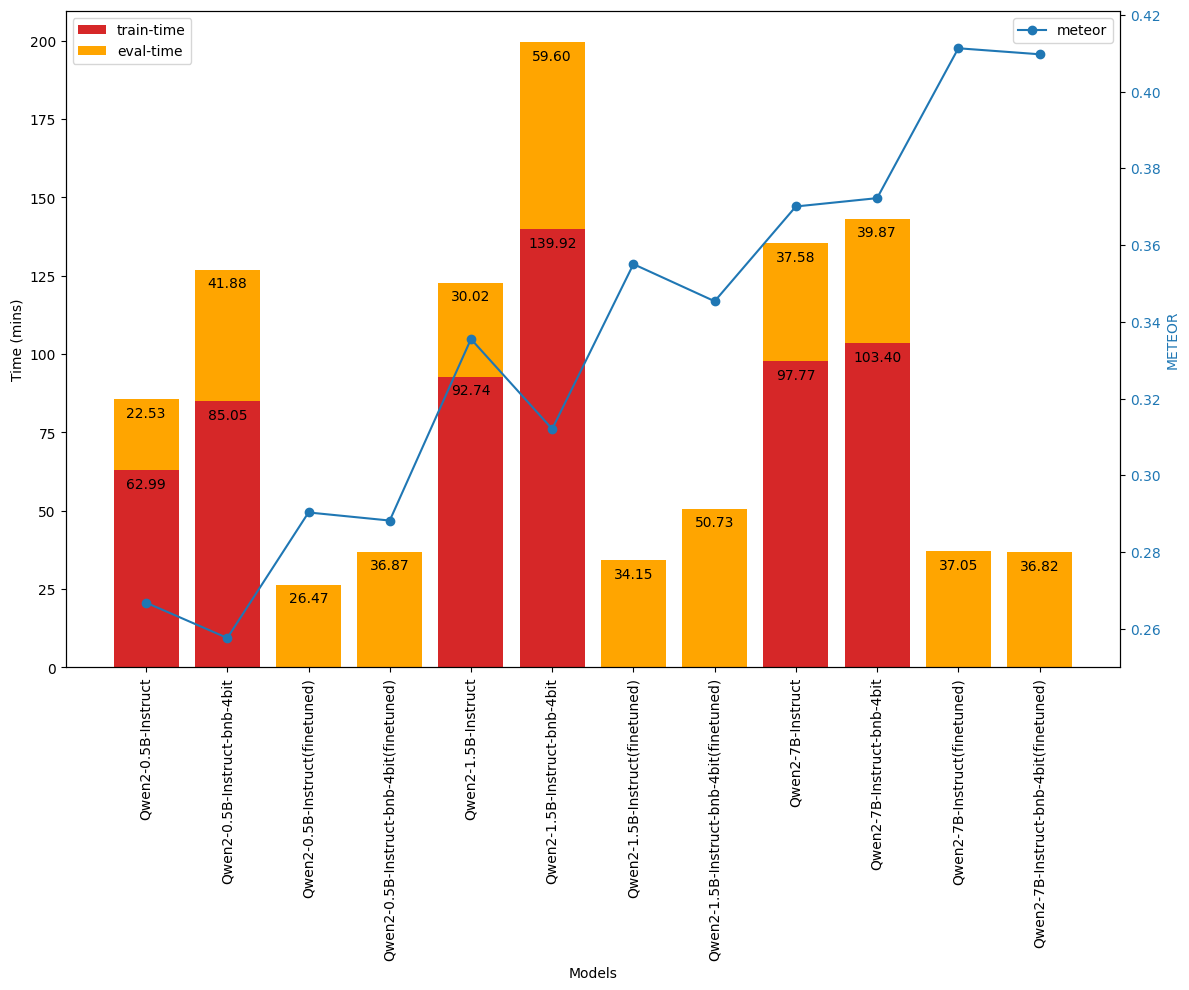

In [ ]:
from llm_toolkit.translation_utils import plot_times

plot_times(perf_df)

## Experiment 2

In [ ]:
import pandas as pd

df = pd.read_csv("results/experiment-2-results.csv")
df.head(2)

chinese  \
0  老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...   
1  次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...   

                                             english  \
0  Old Geng picked up his shotgun, squinted, and ...   
1  Next day Grannie Liu was up before dawn. As so...   

                         unsloth/Qwen2-0.5B-Instruct  \
0  Old Teng holds his gun up, his eyes narrowed a...   
1  The next morning, Liu Geo woke up at five o'cl...   

              unsloth/Qwen2-0.5B-Instruct(finetuned)  \
0  Old Geng raised his rifle and tilted his head ...   
1  But not before noon did Grannie Liu rise up an...   

                         unsloth/Qwen2-1.5B-Instruct  \
0  Old Jin raises his gun, squints one eye as he ...   
1  At dawn the next day, Liu Langlang got up earl...   

              unsloth/Qwen2-1.5B-Instruct(finetuned)  \
0  Old Geng raised his pistol, squinted through t...   
1  She got up about dawn with a purpose already e...   

                           unsloth/Qwen2-7B-Instruct  \
0  Old Geng raised his gun, squinted one of his t...   
1  The next morning, before the dawn had fully br...   

                unsloth/Qwen2-7B-Instruct(finetuned)  \
0  Old Geng raised his rifle and squinted into th...   
1  First thing in the morning Grannie Liu rose to...   

                    unsloth/mistral-7b-instruct-v0.3  \
0  Geng Da initiates firing, squinting to form a ...   
1  The next day, when it was still dark, Liu Lao ...   

         unsloth/mistral-7b-instruct-v0.3(finetuned)  \
0  Old Geng aimed and fired. A triangular slit op...   
1  Before dawn next day Grannie Liu got up and bu...   

       gradientai/Llama-3-8B-Instruct-Gradient-1048k  \
0  The old man pulled out his gun, squinting one ...   
1  The next day, when the sun had not yet risen, ...   

  gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)  \
0  Old Geng raised his rifle, squinting through t...         
1  Grannie Liu got up before daylight was even vi...         

                 unsloth/Qwen2-72B-Instruct-bnb-4bit  \
0  Lao Geng raised his gun, narrowed one of his t...   
1  Before dawn next morning, Granny Liu got up to...   

      unsloth/Qwen2-72B-Instruct-bnb-4bit(finetuned)  
0  Old Geng raised his gun, narrowed one of his t...  
1  As soon as it was light, Grannie Liu got up an...

In [ ]:
metrics_df = get_metrics(df)
metrics_df.describe()

unsloth/Qwen2-0.5B-Instruct: {'accuracy': 0.0, 'correct_ids': [], 'meteor': 0.26453254295068257, 'bleu_scores': {'bleu': 0.04698039499333136, 'precisions': [0.309245348800355, 0.07347623117890723, 0.023966406063295892, 0.008945686900958467], 'brevity_penalty': 1.0, 'length_ratio': 1.0450811526995694, 'translation_length': 31551, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.311193579937054, 'rouge2': 0.08909098431958892, 'rougeL': 0.25609252628986867, 'rougeLsum': 0.25599725080528407}}
unsloth/Qwen2-0.5B-Instruct(finetuned): {'accuracy': 0.00176522506619594, 'correct_ids': [147, 533], 'meteor': 0.28664792904792147, 'bleu_scores': {'bleu': 0.0633353272697663, 'precisions': [0.33089419978517726, 0.08866324714749294, 0.0345015434901035, 0.016769504485747815], 'brevity_penalty': 0.9867295481943301, 'length_ratio': 0.9868168267638291, 'translation_length': 29792, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.31737609540000844, 'rouge2': 0.10644051608097954, 'rougeL': 0

accuracy     meteor     bleu_1    rouge_l
count  12.000000  12.000000  12.000000  12.000000
mean    0.003383   0.353735   0.100411   0.337371
std     0.003926   0.055771   0.037567   0.050444
min     0.000000   0.264533   0.046980   0.256093
25%     0.000662   0.315699   0.069623   0.311106
50%     0.001324   0.355950   0.101607   0.338239
75%     0.005516   0.392410   0.125756   0.371022
max     0.012357   0.457161   0.170018   0.424822

In [ ]:
metrics_df

model  accuracy    meteor  \
0                             Qwen2-0.5B-Instruct  0.000000  0.264533   
1                  Qwen2-0.5B-Instruct(finetuned)  0.001765  0.286648   
2                             Qwen2-1.5B-Instruct  0.000000  0.310808   
3                  Qwen2-1.5B-Instruct(finetuned)  0.004413  0.341287   
4                               Qwen2-7B-Instruct  0.000883  0.370613   
5                    Qwen2-7B-Instruct(finetuned)  0.006178  0.401630   
6                        mistral-7b-instruct-v0.3  0.000883  0.322159   
7             mistral-7b-instruct-v0.3(finetuned)  0.005296  0.387250   
8              Llama-3-8B-Instruct-Gradient-1048k  0.000000  0.317330   
9   Llama-3-8B-Instruct-Gradient-1048k(finetuned)  0.012357  0.392120   
10                    Qwen2-72B-Instruct-bnb-4bit  0.000883  0.393278   
11         Qwen2-72B-Instruct-bnb-4bit(finetuned)  0.007944  0.457161   

      bleu_1   rouge_l                                        all_metrics  
0   0.046980  0.256093  {'accuracy': 0.0, 'correct_ids': [], 'meteor':...  
1   0.063335  0.261258  {'accuracy': 0.00176522506619594, 'correct_ids...  
2   0.071719  0.310355  {'accuracy': 0.0, 'correct_ids': [], 'meteor':...  
3   0.094396  0.317709  {'accuracy': 0.00441306266548985, 'correct_ids...  
4   0.108818  0.359339  {'accuracy': 0.00088261253309797, 'correct_ids...  
5   0.134034  0.379916  {'accuracy': 0.00617828773168579, 'correct_ids...  
6   0.085008  0.317920  {'accuracy': 0.00088261253309797, 'correct_ids...  
7   0.125505  0.358558  {'accuracy': 0.00529567519858782, 'correct_ids...  
8   0.053289  0.311356  {'accuracy': 0.0, 'correct_ids': [], 'meteor':...  
9   0.126232  0.368057  {'accuracy': 0.01235657546337158, 'correct_ids...  
10  0.125597  0.383067  {'accuracy': 0.00088261253309797, 'correct_ids...  
11  0.170018  0.424822  {'accuracy': 0.00794351279788173, 'correct_ids...

In [ ]:
import pandas as pd

df = pd.read_csv("results/experiment-2-results.csv")
metrics_df = get_metrics(df)
metrics_df.describe()
plot_metrics(metrics_df, figsize=(18, 5), ylim=(0, 0.5))

/Users/inflaton/code/engd/projects/llm-finetuning/llm_toolkit/translation_utils.py:144: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(["METEOR", "BLEU-1", "ROUGE-L"])


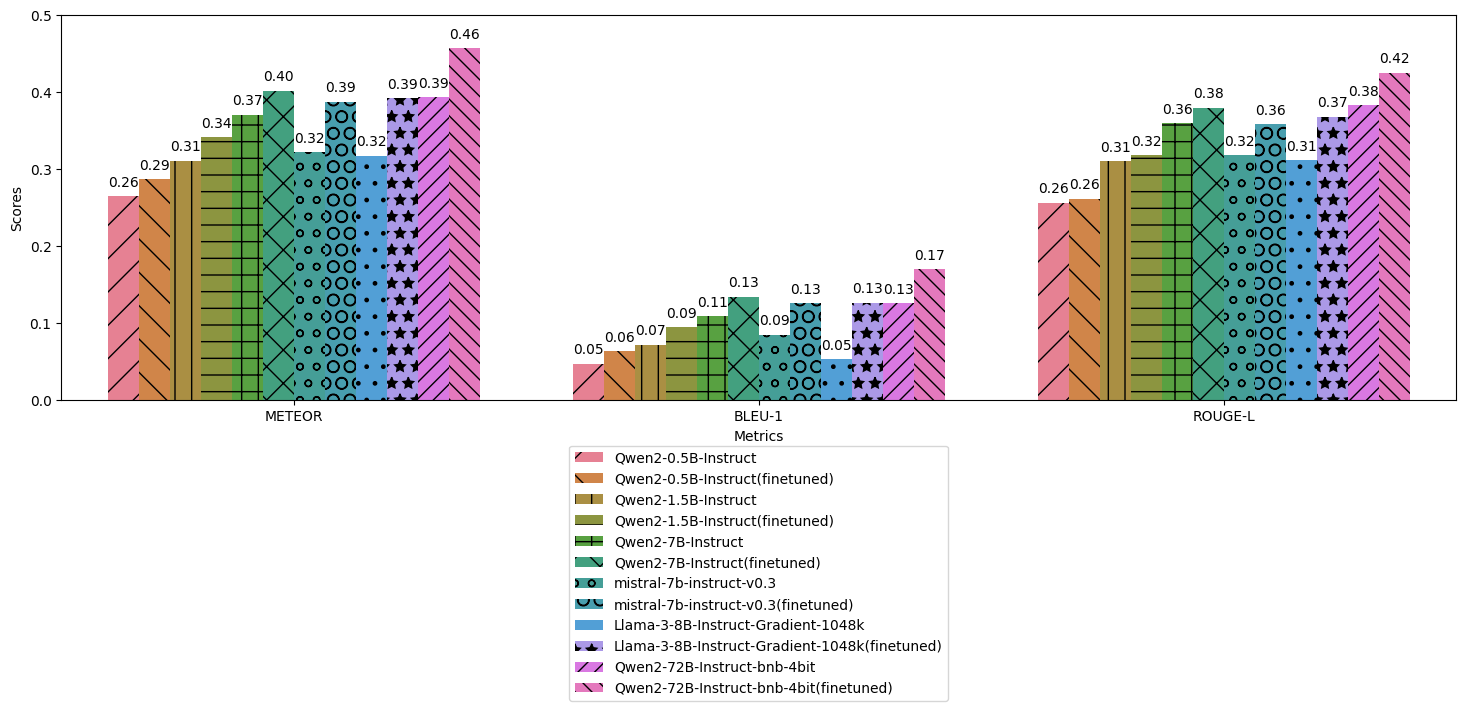

In [ ]:
plot_metrics(metrics_df, figsize=(18, 5), ylim=(0, 0.5))

## Experiment 3

In [ ]:
df = pd.read_csv("results/experiment-3-results.csv")
metrics_df = get_metrics(df)
metrics_df

Qwen2-0.5B(flash-attn:false): {'accuracy': 0.0, 'correct_ids': [], 'meteor': 0.2596076617917167, 'bleu_scores': {'bleu': 0.04409425333473452, 'precisions': [0.33363639542609363, 0.07631808913486746, 0.023275240156433914, 0.007970813340207003], 'brevity_penalty': 0.9458179749826672, 'length_ratio': 0.9472341835044716, 'translation_length': 28597, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3097557467235248, 'rouge2': 0.08642674668219225, 'rougeL': 0.25214875199618664, 'rougeLsum': 0.2522851845174793}}
Qwen2-0.5B(flash-attn:true): {'accuracy': 0.0, 'correct_ids': [], 'meteor': 0.2604145257072387, 'bleu_scores': {'bleu': 0.046012982792608105, 'precisions': [0.3368365553602812, 0.07779038693853645, 0.02424219286859586, 0.009012601690859786], 'brevity_penalty': 0.9406727862276781, 'length_ratio': 0.9423650215303081, 'translation_length': 28450, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3101517051554241, 'rouge2': 0.08890555581222168, 'rougeL': 0.2547030960897408,

model  accuracy    meteor    bleu_1  \
0             Qwen2-0.5B(flash-attn:false)  0.000000  0.259608  0.044094   
1              Qwen2-0.5B(flash-attn:true)  0.000000  0.260415  0.046013   
2  Qwen2-0.5B(finetuned)(flash-attn:false)  0.002648  0.290680  0.060746   
3   Qwen2-0.5B(finetuned)(flash-attn:true)  0.002648  0.287526  0.064151   
4             Qwen2-1.5B(flash-attn:false)  0.000883  0.314090  0.071057   
5              Qwen2-1.5B(flash-attn:true)  0.000000  0.311962  0.072696   
6  Qwen2-1.5B(finetuned)(flash-attn:false)  0.002648  0.349020  0.084510   
7   Qwen2-1.5B(finetuned)(flash-attn:true)  0.002648  0.349413  0.094641   

    rouge_l                                        all_metrics  
0  0.252149  {'accuracy': 0.0, 'correct_ids': [], 'meteor':...  
1  0.254703  {'accuracy': 0.0, 'correct_ids': [], 'meteor':...  
2  0.265362  {'accuracy': 0.00264783759929391, 'correct_ids...  
3  0.265777  {'accuracy': 0.00264783759929391, 'correct_ids...  
4  0.315755  {'accuracy': 0.00088261253309797, 'correct_ids...  
5  0.310530  {'accuracy': 0.0, 'correct_ids': [], 'meteor':...  
6  0.320888  {'accuracy': 0.00264783759929391, 'correct_ids...  
7  0.318565  {'accuracy': 0.00264783759929391, 'correct_ids...

/Users/inflaton/code/engd/projects/llm-finetuning/llm_toolkit/translation_utils.py:144: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(["METEOR", "BLEU-1", "ROUGE-L"])


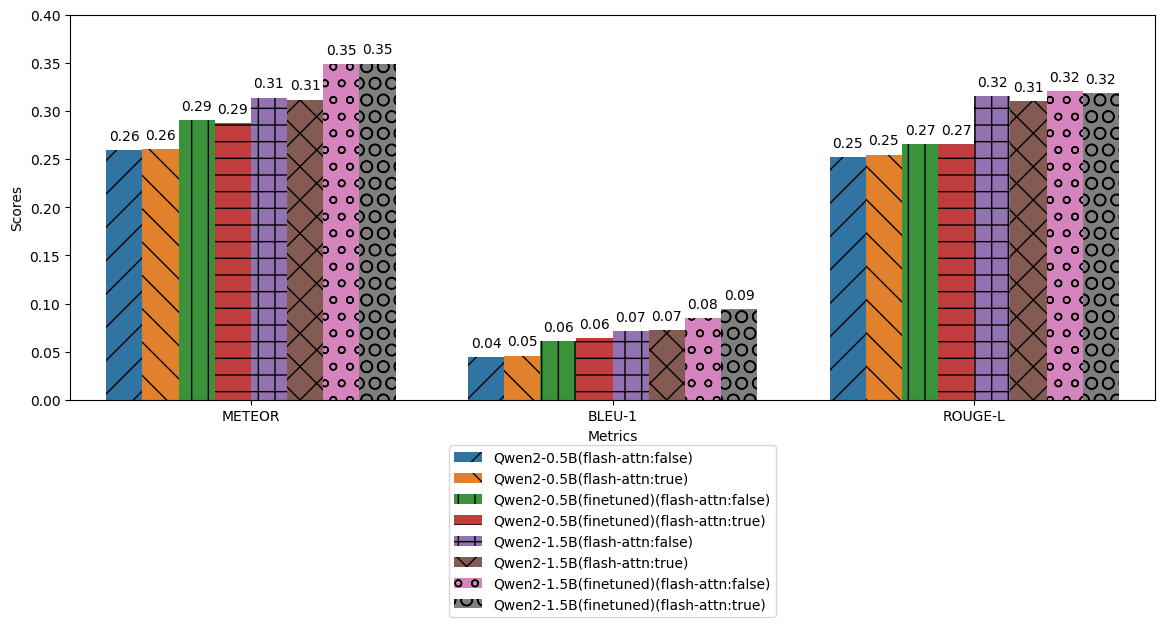

In [ ]:
plot_metrics(metrics_df, ylim=(0, 0.4))

In [ ]:
metrics_df.drop(columns=["all_metrics", "accuracy"], inplace=True, errors="ignore")
metrics_df

model    meteor    bleu_1   rouge_l
0             Qwen2-0.5B(flash-attn:false)  0.259608  0.044094  0.252149
1              Qwen2-0.5B(flash-attn:true)  0.260415  0.046013  0.254703
2  Qwen2-0.5B(finetuned)(flash-attn:false)  0.290680  0.060746  0.265362
3   Qwen2-0.5B(finetuned)(flash-attn:true)  0.287526  0.064151  0.265777
4             Qwen2-1.5B(flash-attn:false)  0.314090  0.071057  0.315755
5              Qwen2-1.5B(flash-attn:true)  0.311962  0.072696  0.310530
6  Qwen2-1.5B(finetuned)(flash-attn:false)  0.349020  0.084510  0.320888
7   Qwen2-1.5B(finetuned)(flash-attn:true)  0.349413  0.094641  0.318565

In [ ]:
def get_minutes(time_str):
    parts = time_str.split(":")
    if len(parts) == 3:
        h, m, s = parts
    else:
        h, m  = parts
        s = 0
    return int(h) * 60 + int(m) + int(s) / 60

In [ ]:
def get_times(metrics_df, df_time):
    train_time = []
    eval_time = []
    for idx, row in metrics_df.iterrows():
        model_name = row["model"]
        with_flash_attn = "true" in model_name
        finetuned = "finetuned" in model_name
        model_name = model_name.split("(")[0]
        # print(model_name, with_flash_attn)
        model_time = df_time[df_time["model"] == model_name][
            df_time["with_flash_attn"] == with_flash_attn
        ].iloc[0]

        if finetuned:
            train_time.append(model_time["train_time"])
            eval_time.append(get_minutes(model_time["fine_tuned_model_eval_time"]))
        else:
            train_time.append(model_time["train_time"])
            eval_time.append(get_minutes(model_time["base_model_eval_time"]))

    return train_time, eval_time

In [ ]:
def get_perf_df(metrics_df, bnb_4bit=False):
    df_time = pd.read_csv("results/model_training_evaluation_times.csv")
    df_time = df_time[df_time["4bit"] == bnb_4bit]
    df_time.drop(columns=["4bit"], inplace=True)
    # print(df_time.to_markdown())
    perf_df = metrics_df.copy()
    perf_df.drop(columns=["bleu_1", "rouge_l"], inplace=True)

    perf_df["train-time(mins)"], perf_df["eval-time(mins)"] = get_times(metrics_df, df_time)
    if bnb_4bit:
        perf_df.drop(columns=["meteor"], inplace=True)
    
    return perf_df

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_19830/2495696642.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_time = df_time[df_time["model"] == model_name][
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_19830/2495696642.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_time = df_time[df_time["model"] == model_name][
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_19830/2495696642.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_time = df_time[df_time["model"] == model_name][
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_19830/2495696642.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_time = df_time[df_time["model"] == model_name][
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_19830/2495696642.py:10: UserWarning: Boolean Series key will be reindexed to matc

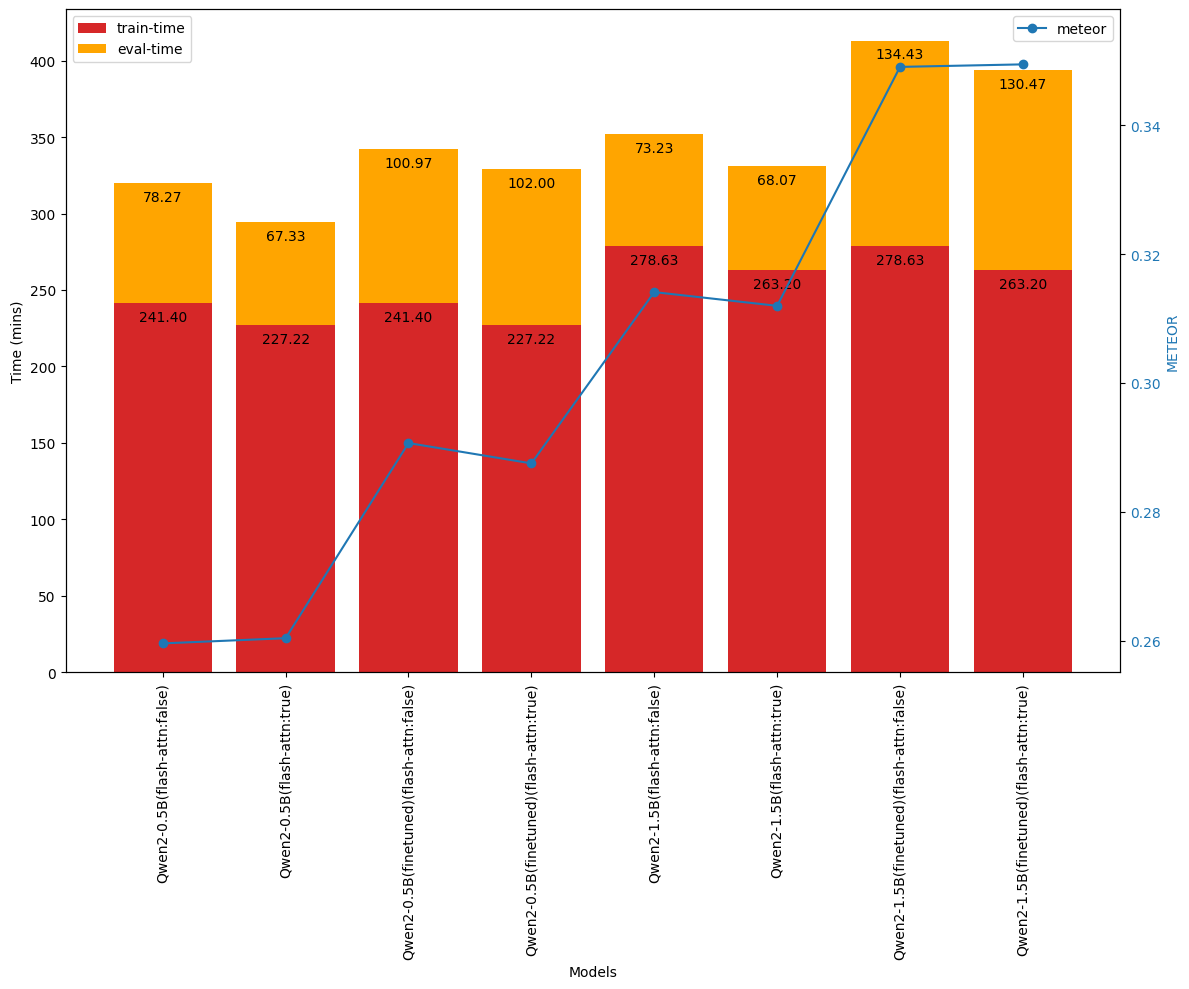

In [ ]:
from llm_toolkit.translation_utils import plot_times
perf_df = get_perf_df(metrics_df)
plot_times(perf_df, ylim=0.358)

In [ ]:
perf_df["train-time(mins)"].mean(), perf_df["eval-time(mins)"].mean(), perf_df[
    "train-time(mins)"
].mean() + 2 * perf_df["eval-time(mins)"].mean()

(252.61249999999998, 94.34583333333333, 441.3041666666667)

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_19830/2495696642.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_time = df_time[df_time["model"] == model_name][
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_19830/2495696642.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_time = df_time[df_time["model"] == model_name][
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_19830/2495696642.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_time = df_time[df_time["model"] == model_name][
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_19830/2495696642.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_time = df_time[df_time["model"] == model_name][
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_19830/2495696642.py:10: UserWarning: Boolean Series key will be reindexed to matc

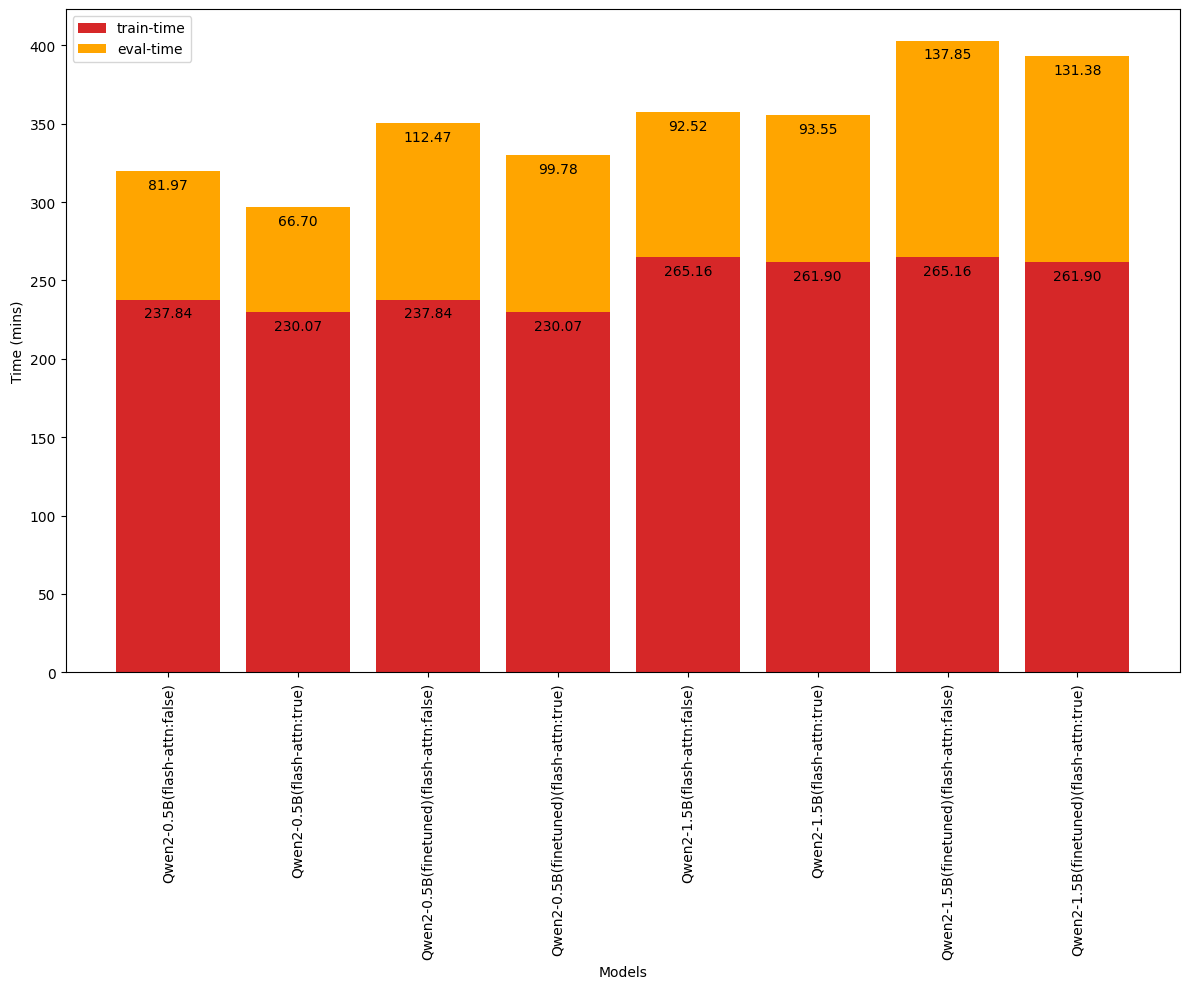

In [ ]:
from llm_toolkit.translation_utils import plot_times

perf_df = get_perf_df(metrics_df, bnb_4bit=True)
plot_times(perf_df, ylim=0.358)

In [ ]:
perf_df["train-time(mins)"].mean(), perf_df["eval-time(mins)"].mean(), perf_df[
    "train-time(mins)"
].mean() + 2 * perf_df["eval-time(mins)"].mean()

(248.74249999999998, 102.02708333333334, 452.7966666666666)

## Experiment 4 - Performance vs Epochs

In [ ]:
import pandas as pd

df = pd.read_csv("results/mac-results_lf.csv")
df.head(2)

chinese  \
0  老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...   
1  次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...   

                                             english  \
0  Old Geng picked up his shotgun, squinted, and ...   
1  Next day Grannie Liu was up before dawn. As so...   

             Qwen/Qwen2-0.5B-Instruct_checkpoint-560  \
0  Old Trinket raised his gun and squinted his tr...   
1  In the morning she was up early for breakfast ...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-1120  \
0  Old Geng raised his gun, his eyes narrowed. Th...   
1  In the morning, however, when the sun was just...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-1680  \
0  Old Geng held his gun up, half-closed, and coc...   
1  In the morning when the sun was just rising, G...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-2240  \
0  Old Geng raised his gun, his triangular eye ha...   
1  It was still dark before she got up for breakf...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-2800  \
0  Old Geng took out his pistol, squinted over a ...   
1  In the early hours of the next day, when it wa...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-3360  \
0  Old Geng held his rifle up and cocked it over ...   
1  By day's dawn her old lady had risen from bed ...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-3920  \
0  Old Geng held his gun to his chest, eyes on a ...   
1  By the time the next morning was over, Grannie...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-4480  ...  \
0  Old Geng took up his gun and raised a triangul...  ...   
1  It was just now six o'clock that the old woman...  ...   

             Qwen/Qwen2-1.5B-Instruct_checkpoint-560  \
0  Grannie Geng held up his gun with one eye, nar...   
1  By morning of the next day, Old Liu got up ver...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-1120  \
0  Old Geng raised his rifle and squinted at it t...   
1  At dawn the next day, Grannie Liu got up and w...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-1680  \
0  Old Geng took his gun off the table and raised...   
1  By midnight, Grannie Liu had risen from her be...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-2240  \
0  Old Geng raised his rifle and squeezed the tri...   
1  When she arose from her bed at daybreak the ne...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-2800  \
0  Old Geng took aim and squeezed the trigger; do...   
1  As soon as it was light outside, Grannie Liu r...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-3360  \
0  Old Geng took a step forward, raised his pisto...   
1  By daybreak she was up and dressed, having ins...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-3920  \
0  Old Geng raised his pistol, opened it up, and ...   
1  At daybreak the old woman got up and dressed h...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-4480  \
0  Old Geng took a shot with his rifle. A spray o...   
1  When she woke from her nap, Aunt Liu dressed h...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-5040  \
0  Old Geng took a step forward, raised his rifle...   
1  Then at daybreak the old woman was up and abou...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-5600  
0  Old Geng reached for his rifle, wedged it to h...  
1  Grannie Liu got up very early the morning of t...  

[2 rows x 22 columns]

In [ ]:
df.columns.to_list()

['chinese',
 'english',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-560',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-1120',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-1680',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-2240',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-2800',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-3360',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-3920',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-4480',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-5040',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-5600',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-560',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-1120',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-1680',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-2240',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-2800',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-3360',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-3920',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-4480',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-5040',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-5600']

In [ ]:
df2 = pd.read_csv("results/experiment-2-results.csv")

In [ ]:
df2.head(2)

chinese  \
0  老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...   
1  次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...   

                                             english  \
0  Old Geng picked up his shotgun, squinted, and ...   
1  Next day Grannie Liu was up before dawn. As so...   

                         unsloth/Qwen2-0.5B-Instruct  \
0  Old Teng holds his gun up, his eyes narrowed a...   
1  The next morning, Liu Geo woke up at five o'cl...   

              unsloth/Qwen2-0.5B-Instruct(finetuned)  \
0  Old Geng raised his rifle and tilted his head ...   
1  But not before noon did Grannie Liu rise up an...   

                         unsloth/Qwen2-1.5B-Instruct  \
0  Old Jin raises his gun, squints one eye as he ...   
1  At dawn the next day, Liu Langlang got up earl...   

              unsloth/Qwen2-1.5B-Instruct(finetuned)  \
0  Old Geng raised his pistol, squinted through t...   
1  She got up about dawn with a purpose already e...   

                           unsloth/Qwen2-7B-Instruct  \
0  Old Geng raised his gun, squinted one of his t...   
1  The next morning, before the dawn had fully br...   

                unsloth/Qwen2-7B-Instruct(finetuned)  \
0  Old Geng raised his rifle and squinted into th...   
1  First thing in the morning Grannie Liu rose to...   

                    unsloth/mistral-7b-instruct-v0.3  \
0  Geng Da initiates firing, squinting to form a ...   
1  The next day, when it was still dark, Liu Lao ...   

         unsloth/mistral-7b-instruct-v0.3(finetuned)  \
0  Old Geng aimed and fired. A triangular slit op...   
1  Before dawn next day Grannie Liu got up and bu...   

       gradientai/Llama-3-8B-Instruct-Gradient-1048k  \
0  The old man pulled out his gun, squinting one ...   
1  The next day, when the sun had not yet risen, ...   

  gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)  \
0  Old Geng raised his rifle, squinting through t...         
1  Grannie Liu got up before daylight was even vi...         

                 unsloth/Qwen2-72B-Instruct-bnb-4bit  \
0  Lao Geng raised his gun, narrowed one of his t...   
1  Before dawn next morning, Granny Liu got up to...   

      unsloth/Qwen2-72B-Instruct-bnb-4bit(finetuned)  
0  Old Geng raised his gun, narrowed one of his t...  
1  As soon as it was light, Grannie Liu got up an...

In [ ]:
import re  # Import the re module for regex operations

dict = {
    "epoch": [],
}

for col in df.columns[2:]:
    # Split using regex
    parts = re.split(r"[/|_]", col)  # Use re.split() to split by regex
    # print(parts)
    model_name = parts[1]
    checkpoint = parts[2]
    epoch = int(checkpoint.split("-")[1]) // 560
    print(model_name, checkpoint, epoch)

    if model_name not in dict:
        dict[model_name] = []
        metrics = calc_metrics(df["english"], df2[f"unsloth/{model_name}"])
        dict[model_name].append(metrics["meteor"])
        dict["epoch"].append(0)

    metrics = calc_metrics(df["english"], df[col])
    dict[model_name].append(metrics["meteor"])
    dict["epoch"].append(epoch)

dict["epoch"] = dict["epoch"][: len(dict[model_name])]
dict

Qwen2-0.5B-Instruct checkpoint-560 1
Qwen2-0.5B-Instruct checkpoint-1120 2
Qwen2-0.5B-Instruct checkpoint-1680 3
Qwen2-0.5B-Instruct checkpoint-2240 4
Qwen2-0.5B-Instruct checkpoint-2800 5
Qwen2-0.5B-Instruct checkpoint-3360 6
Qwen2-0.5B-Instruct checkpoint-3920 7
Qwen2-0.5B-Instruct checkpoint-4480 8
Qwen2-0.5B-Instruct checkpoint-5040 9
Qwen2-0.5B-Instruct checkpoint-5600 10
Qwen2-1.5B-Instruct checkpoint-560 1
Qwen2-1.5B-Instruct checkpoint-1120 2
Qwen2-1.5B-Instruct checkpoint-1680 3
Qwen2-1.5B-Instruct checkpoint-2240 4
Qwen2-1.5B-Instruct checkpoint-2800 5
Qwen2-1.5B-Instruct checkpoint-3360 6
Qwen2-1.5B-Instruct checkpoint-3920 7
Qwen2-1.5B-Instruct checkpoint-4480 8
Qwen2-1.5B-Instruct checkpoint-5040 9
Qwen2-1.5B-Instruct checkpoint-5600 10


{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Qwen2-0.5B-Instruct': [0.26453254295068257,
  0.28906766286950575,
  0.3075388134142166,
  0.3232125016634757,
  0.3141676906431015,
  0.31468732087511564,
  0.3060953047058868,
  0.29569751947150547,
  0.29297589531864165,
  0.2833319356953958,
  0.28432663251720675],
 'Qwen2-1.5B-Instruct': [0.3108076173265163,
  0.3555548051770412,
  0.364551066769633,
  0.3723931629938662,
  0.35847259317675817,
  0.35988930837184085,
  0.3460642024871934,
  0.3479480952549209,
  0.33844145976530193,
  0.3380289789419591,
  0.3339867178782917]}

In [ ]:
# create df from dict
perf_df = pd.DataFrame(dict)

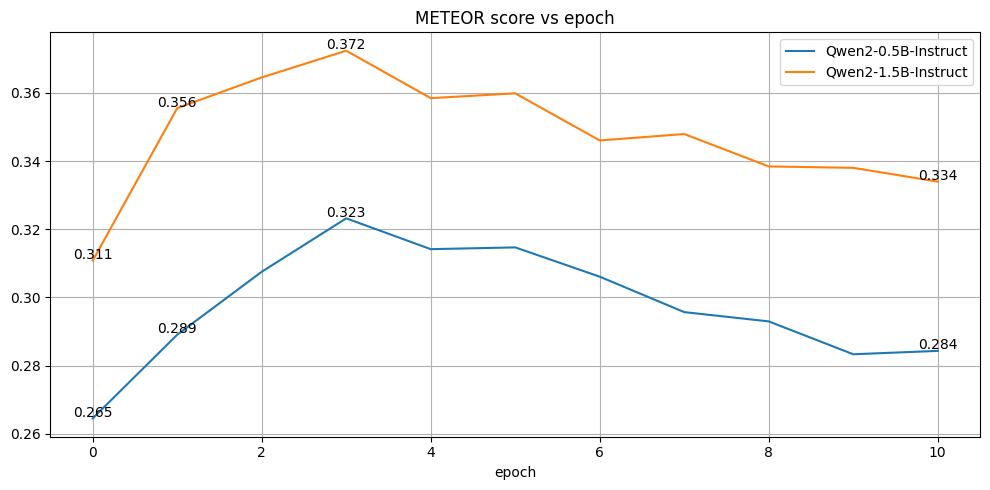

In [ ]:
import matplotlib.pyplot as plt
from numpy import argmax

# Assuming perf_df.set_index("epoch").plot() generates a line plot
ax = perf_df.set_index("epoch").plot(
    figsize=(10, 5), title="METEOR score vs epoch", grid=True
)

# Loop through each line to annotate the last point
for line in ax.lines:
    # Get the data
    xdata, ydata = line.get_data()
    for index in [0, 1, argmax(ydata), -1]:
        ax.annotate(
            f"{ydata[index]:.3f}",
            xy=(xdata[index], ydata[index]),
            textcoords="offset points",
            xytext=(0, 1),
            ha="center",
        )

plt.tight_layout()
plt.show()

## Experiment 5 - Llama Factory: Performance/Repetition vs Epochs

In [51]:
import pandas as pd

df = pd.read_csv("results/mac-results_lf-r2.csv")
df.head(2)

chinese  \
0  老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...   
1  次日天未明时，刘姥姥便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...   

                                             english  \
0  Old Geng picked up his shotgun, squinted, and ...   
1  Next day Grannie Liu was up before dawn. As so...   

                            Qwen/Qwen2-0.5B-Instruct  \
0  Old Ge lifted his gun and lowered his eyes as ...   
1  The next day, when the sun was still very earl...   

             Qwen/Qwen2-0.5B-Instruct_checkpoint-560  \
0  Old Goong cocked his gun and lowered his eyes ...   
1  It was still night when she rose to dress up; ...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-1120  \
0  Old Geng held his gun up, his eyes narrowed. T...   
1  It was still dark before her eyes when she got...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-1680  \
0  Old Geng took his pistol from his holster and ...   
1  When she awoke again from her nap, she was alr...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-2240  \
0  Old Geng raised his rifle, narrowed his eyes, ...   
1  By dawn's hour again the next day, Grannie Liu...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-2800  \
0  Old Geng raised his rifle,眯着眼睛，the trigger cli...   
1  By day's dawn she was out of bed, having alrea...   

            Qwen/Qwen2-0.5B-Instruct_checkpoint-3360  \
0  Old Geng held his gun at someone's head, his e...   
1  At about three o'clock in the morning the next...   

                            Qwen/Qwen2-1.5B-Instruct  \
0  Old耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝...   
1  The next morning, when it was still dark, Liu ...   

             Qwen/Qwen2-1.5B-Instruct_checkpoint-560  \
0  Old Geng took up his rifle and squinted throug...   
1  Misty rose at dawn the next morning, having dr...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-1120  \
0  Old Geng raised his gun, squinted at it throug...   
1  When it was just dawn outside her room, Granni...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-1680  \
0  Old Geng took a step forward with his gun rais...   
1  By daybreak she got up, dressed herself, and w...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-2240  \
0  Old Geng took up his weapon with a squinted lo...   
1  When she got up the next morning before daybre...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-2800  \
0  Old Geng took a step forward, raised his pisto...   
1  When she arose from bed at midnight, she had a...   

            Qwen/Qwen2-1.5B-Instruct_checkpoint-3360  \
0  Old Geng took a step forward, lifted his pisto...   
1  At daybreak the old woman woke up from her slu...   

                  unsloth/qwen2-7b-instruct-bnb-4bit  
0  Old Geng raised his gun, squinted one of his t...  
1  The next morning, before daybreak, Mrs. Liu ro...

In [52]:
df.columns.to_list()

['chinese',
 'english',
 'Qwen/Qwen2-0.5B-Instruct',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-560',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-1120',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-1680',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-2240',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-2800',
 'Qwen/Qwen2-0.5B-Instruct_checkpoint-3360',
 'Qwen/Qwen2-1.5B-Instruct',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-560',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-1120',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-1680',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-2240',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-2800',
 'Qwen/Qwen2-1.5B-Instruct_checkpoint-3360',
 'unsloth/qwen2-7b-instruct-bnb-4bit']

In [46]:
from eval_modules.calc_repetitions import *

import re  # Import the re module for regex operations

def calc_metrics_for_epochs(df, start_col=2, end_col=-3, alpha=0.1):
    dict = {
        "epoch": [],
    }

    columns = df.columns[start_col:end_col]
    # print(columns)

    for col in columns:
        # Split using regex
        parts = re.split(r"[/|_]", col)  # Use re.split() to split by regex
        model_name = parts[1]
        if len(parts) == 3:
            checkpoint = parts[2]
            epoch = int(checkpoint.split("-")[1]) // 560
        else:
            epoch = 0
            checkpoint = "base"

        dict["epoch"].append(epoch)

        if model_name not in dict:
            dict[model_name] = []
            dict[model_name + "(RAP)"] = []

        metrics = calc_metrics(df["english"], df[col])
        dict[model_name].append(metrics["meteor"])
        print("*****", model_name, checkpoint, epoch)

        df[["ews_score", "repetition_score", "total_repetitions"]] = df[col].apply(
            detect_scores
        )
        print("ews_score:", df["ews_score"].mean())
        print("repetition_score:", df["repetition_score"].mean())
        print("total_repetitions:", df["total_repetitions"].mean())

        # find the record with the highest total_repetitions
        print("highest total_repetitions:", df["total_repetitions"].max())

        index = df["total_repetitions"].idxmax()
        print("\t@", index, ":", df[col][index])

        rap = dict[model_name][-1] / math.log10(10 + alpha * df["total_repetitions"].mean())
        dict[model_name + "(RAP)"].append(rap)

        print("meteor:", dict[model_name][-1])
        print("rap:", rap)

    dict["epoch"] = dict["epoch"][: len(dict[model_name])]
    # print(dict)
    return pd.DataFrame(dict)

In [47]:
perf_df = calc_metrics_for_epochs(df, end_col=16)
perf_df

***** Qwen2-0.5B-Instruct base 0
ews_score: 0.0
repetition_score: 8.962047661076788
total_repetitions: 8.962047661076788
highest total_repetitions: 10070
	@ 1079 : Peter said that he would not have dared to disturb him if it was not for his birthday on the 2nd of January; because they had been looking for him in various places; so he is thin and long, with a thick and long stalk, and fresh, sweet, juicy, yellow, and white flowers; large, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big, big

epoch  Qwen2-0.5B-Instruct  Qwen2-0.5B-Instruct(RAP)  Qwen2-1.5B-Instruct  \
0      0             0.260813                  0.251441             0.314630   
1      1             0.290495                  0.273051             0.360198   
2      2             0.310496                  0.310396             0.371515   
3      3             0.322997                  0.322698             0.372044   
4      4             0.316296                  0.316117             0.363441   
5      5             0.312835                  0.297146             0.359094   
6      6             0.311528                  0.302253             0.348655   

   Qwen2-1.5B-Instruct(RAP)  
0                  0.314459  
1                  0.359851  
2                  0.371226  
3                  0.345973  
4                  0.363117  
5                  0.358958  
6                  0.348191

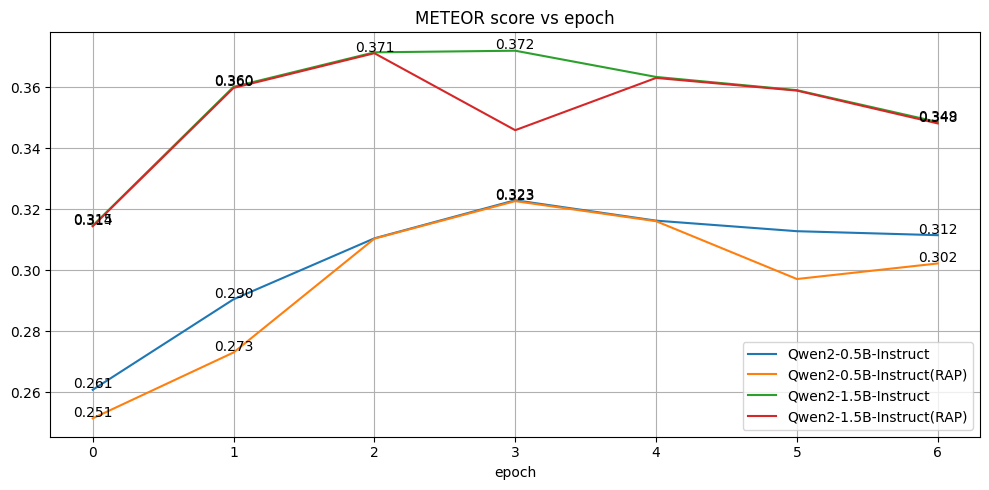

In [48]:
import matplotlib.pyplot as plt
from numpy import argmax

# Assuming perf_df.set_index("epoch").plot() generates a line plot
ax = perf_df.set_index("epoch").plot(
    figsize=(10, 5), title="METEOR score vs epoch", grid=True
)

# Loop through each line to annotate the last point
for line in ax.lines:
    # Get the data
    xdata, ydata = line.get_data()
    for index in [0, 1, argmax(ydata), -1]:
        ax.annotate(
            f"{ydata[index]:.3f}",
            xy=(xdata[index], ydata[index]),
            textcoords="offset points",
            xytext=(0, 1),
            ha="center",
        )

plt.tight_layout()
plt.show()

In [53]:
calc_metrics_for_epochs(df, start_col=16, end_col=17)

***** qwen2-7b-instruct-bnb-4bit base 0
ews_score: 0.0
repetition_score: 0.2621359223300971
total_repetitions: 0.2621359223300971
highest total_repetitions: 162
	@ 327 : The sequence you provided appears to be a series of patterns or codes rather than a straightforward sentence or phrase. Here's the translation:

"Short long long, short long long, short short short, long long short short, long long short long, short short long, short short short long, long short long short, long short short short."

If this sequence is meant to convey something specific (like a code or pattern), the context would help in understanding its meaning. As it stands, this is the literal translation of the given Chinese text into English.
meteor: 0.37148866818883547
rap: 0.3710667829506641


epoch  qwen2-7b-instruct-bnb-4bit  qwen2-7b-instruct-bnb-4bit(RAP)
0      0                    0.371489                         0.371067